In [15]:
import pandas as pd
from subprocess import Popen, PIPE
# from sleep_utils.schedule import Sleeper, Optimal, Calendar, Event, adjust
# from sleep_utils.sleep_score import sleep_score
import os
import mne
import yasa
import numpy as np
import matplotlib.pyplot as plt
from yasa import Hypnogram
import io

In [11]:
def convert_csv_to_stages(input_csv):
    sample_data = pd.read_csv(input_csv)
    sample_data =sample_data.fillna(0)
    sampling_rate = 256
    ch_names = ['TP9', 'AF7', 'AF8', 'TP10']
    time_series = []
    time_series.append(np.array(sample_data['ch1']))
    time_series.append(np.array(sample_data['ch2']))
    time_series.append(np.array(sample_data['ch3']))
    time_series.append(np.array(sample_data['ch4']))
    time_series = np.array(time_series)
    info = mne.create_info(ch_names,sampling_rate)
    raw = mne.io.RawArray(time_series, info)
    sls = yasa.SleepStaging(raw, eeg_name="TP10", metadata=dict(age=21, male=False))
    y_pred = sls.predict()
    df_pred = pd.DataFrame({'Stage': y_pred})
    sleep_cycles = list(df_pred["Stage"])
    return sleep_cycles

In [12]:
def remove_leading(arr, target_element):
    first_diff_index = np.argmax(arr != target_element)
    return arr[first_diff_index:]
    
def remove_trailing(arr, target_element):
    
    # Reverse the array to find the index of the last non-target element
    reversed_arr = arr[::-1]
    
    # Find the first index in the reversed array that is not the target_element
    first_non_target_index = np.argmax(reversed_arr != target_element)

    return arr[:-first_non_target_index] if first_non_target_index > 0 else arr

def calculate_score(n3_p, d_p, w_p):
    n3_score = min(n3_p * (20 / 25), 20)  
    
    d_score = min(n3_p * (60 / 70), 60)  
    
    if w_p <= 10:
        w_score = 20 
    else:
        w_score = max(20 - (w_p - 10) * (20 / 10), 0) 
    total_score = n3_score + d_score + w_score
    return total_score

def calculate_sleep_score(input_csv):
    # Read sleep stages from the text file
    sleep_stages = convert_csv_to_stages(input_csv)
    sleep_stages = np.array(sleep_stages)
    sleep_stages = remove_leading(sleep_stages, 'W')
    sleep_stages = remove_trailing(sleep_stages, 'W')
    w_p = (np.count_nonzero(sleep_stages == "W")/sleep_stages.size) *100
    n1_p = (np.count_nonzero(sleep_stages == "N1")/sleep_stages.size) *100
    n2_p = (np.count_nonzero(sleep_stages == "N2")/sleep_stages.size) *100
    n3_p = (np.count_nonzero(sleep_stages == "N3")/sleep_stages.size) *100
    r_p = (np.count_nonzero(sleep_stages == "R")/sleep_stages.size) *100
    d_p = n2_p + n3_p
    return calculate_score(n3_p,d_p,w_p)

Creating RawArray with float64 data, n_channels=4, n_times=5395440
    Range : 0 ... 5395439 =      0.000 ... 21075.934 secs
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\dumbl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


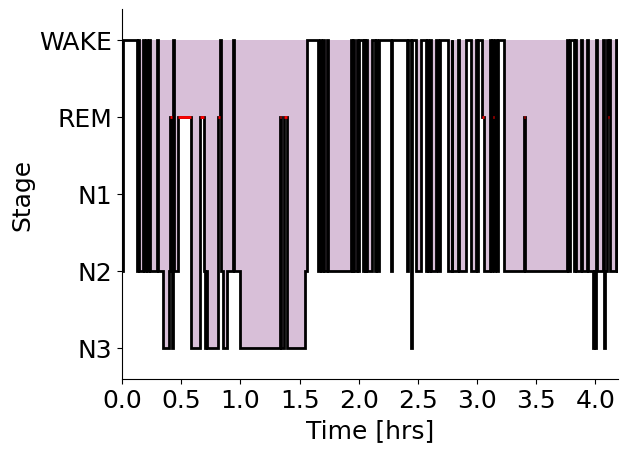

In [18]:
sleep_stages = convert_csv_to_stages("sleep_eeg.csv")
sleep_stages = np.array(sleep_stages)
sleep_stages = remove_leading(sleep_stages, 'W')
sleep_stages = remove_trailing(sleep_stages, 'W')
hyp = Hypnogram(sleep_stages, freq="30s")


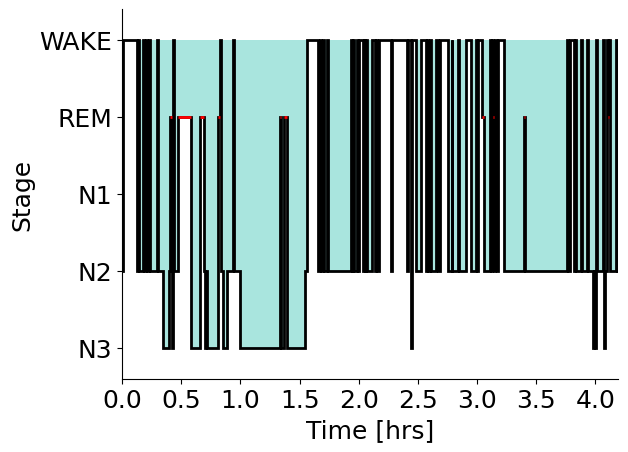

In [27]:
ax = hyp.plot_hypnogram(lw=2, fill_color='#A9E5DE')

In [3]:
calculate_sleep_score("sleep_eeg.csv")

NameError: name 'calculate_sleep_score' is not defined

In [28]:
current_dir = os.getcwd()
csv_file_path = os.path.join(current_dir, "sleep_eeg.csv")
sleep_score_value = calculate_sleep_score(csv_file_path)
print("Sleep Score:", sleep_score_value)

Creating RawArray with float64 data, n_channels=4, n_times=5395440
    Range : 0 ... 5395439 =      0.000 ... 21075.934 secs
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Sleep Score: 32.28628230616302


C:\Users\dumbl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [29]:
sleep_stages = convert_csv_to_stages("sleep_eeg.csv")

Creating RawArray with float64 data, n_channels=4, n_times=5395440
    Range : 0 ... 5395439 =      0.000 ... 21075.934 secs
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\dumbl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [30]:
sleep_stages = np.array(sleep_stages)

In [31]:
def remove_leading(arr, target_element):
    first_diff_index = np.argmax(arr != target_element)
    return arr[first_diff_index:]
def remove_trailing(arr, target_element):
    # Reverse the array to find the index of the last non-target element
    reversed_arr = arr[::-1]
    
    # Find the first index in the reversed array that is not the target_element
    first_non_target_index = np.argmax(reversed_arr != target_element)
    
    # Slice the original array up to this point from the end
    return arr[:-first_non_target_index] if first_non_target_index > 0 else arr
def calculate_score(n3_p, d_p, w_p):
    n3_score = min(n3_p * (20 / 25), 20)  
    
    d_score = min(n3_p * (60 / 70), 60)  
    
    if w_p <= 10:
        w_score = 20 
    else:
        w_score = max(20 - (w_p - 10) * (20 / 10), 0) 
    total_score = n3_score + d_score + w_score
    return total_score

In [ ]:
    
    
    sleep_stages = remove_leading(sleep_stages, 'W')
    sleep_stages = remove_trailing(sleep_stages, 'W')
    w_p = (np.count_nonzero(sleep_stages == "W")/sleep_stages.size) *100
    n1_p = (np.count_nonzero(sleep_stages == "N1")/sleep_stages.size) *100
    n2_p = (np.count_nonzero(sleep_stages == "N2")/sleep_stages.size) *100
    n3_p = (np.count_nonzero(sleep_stages == "N3")/sleep_stages.size) *100
    r_p = (np.count_nonzero(sleep_stages == "R")/sleep_stages.size) *100
    d_p = n2_p + n3_p
    return calculate_score(n3_p,d_p,w_p)

In [66]:
w_p = (np.count_nonzero(sleep_stages == "W")/sleep_stages.size) *100
n1_p = (np.count_nonzero(sleep_stages == "N1")/sleep_stages.size) *100
n2_p = (np.count_nonzero(sleep_stages == "N2")/sleep_stages.size) *100
n3_p = (np.count_nonzero(sleep_stages == "N3")/sleep_stages.size) *100
r_p = (np.count_nonzero(sleep_stages == "R")/sleep_stages.size) *100

d_p = n2_p + n3_p
# w_op = 
# n3_op = 25

In [67]:
# w_p = 9
# n3_p = 25

In [72]:
d_p

66.79920477137176

In [77]:
def calculate_score(n3_p, d_p, w_p):
    n3_score = min(n3_p * (20 / 25), 20)  
    
    d_score = min(n3_p * (60 / 70), 60)  
    
    if w_p <= 10:
        w_score = 20 
    else:
        w_score = max(20 - (w_p - 10) * (20 / 10), 0) 
    total_score = n3_score + d_score + w_score
    return total_score

In [78]:
calculate_score(n3_p,d_p,w_p)

29.781312127236582

In [79]:
sleep_stages

array(['N2', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W',
       'W', 'W', 'N2', 'W', 'N2', 'N2', 'N2', 'N2', 'W', 'N2', 'N2', 'W',
       'N2', 'N2', 'W', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'W',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N2', 'R', 'R', 'N3', 'W', 'N2', 'N2', 'N2', 'N2', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'R', 'R', 'R', 'R', 'N2',
       'N3', 'N2', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'R', 'R', 'W', 'N2', 'N2', 'N3', 'N3', 'N3', 'N3',
       'N2', 'N2', 'N2', 'N2', 'N2', 'N2', 'W', 'N2', 'N2', 'N2', 'N2',
       'N2', 'N2', 'N2', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3',
       'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3', 'N3

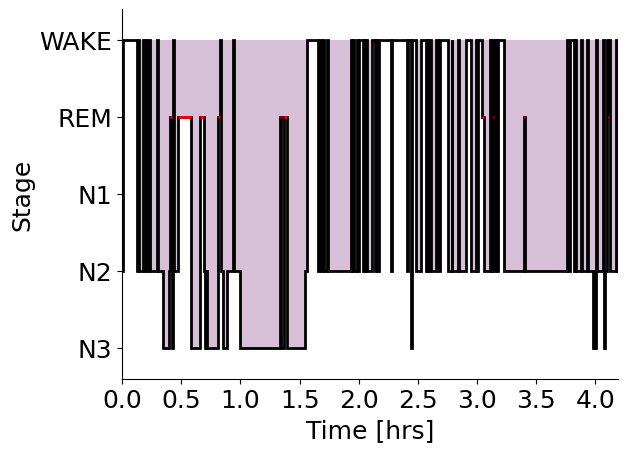

In [86]:
hyp = Hypnogram(sleep_stages, freq="30s")
ax = hyp.plot_hypnogram(lw=2, fill_color="thistle")